# Import thư viện cần thiết

In [3]:
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import warnings
from plotly.subplots import make_subplots
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
#from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

In [4]:
df = pd.read_csv('Customer-Churn-Records.csv')

# Tổng quan về dataset

In [5]:
df.shape

(10000, 18)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [7]:
df.dtypes

RowNumber               int64
CustomerId              int64
Surname                object
CreditScore             int64
Geography              object
Gender                 object
Age                     int64
Tenure                  int64
Balance               float64
NumOfProducts           int64
HasCrCard               int64
IsActiveMember          int64
EstimatedSalary       float64
Exited                  int64
Complain                int64
Satisfaction Score      int64
Card Type              object
Point Earned            int64
dtype: object

In [8]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


In [9]:
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [10]:
df.tail(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0,0,3,DIAMOND,911


In [11]:
total_cols = 'Exited'
cols = df.columns.tolist()
cols.remove(total_cols)
len(cols)


17

In [12]:
cols

['RowNumber',
 'CustomerId',
 'Surname',
 'CreditScore',
 'Geography',
 'Gender',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Complain',
 'Satisfaction Score',
 'Card Type',
 'Point Earned']

In [13]:
df.RowNumber.value_counts()

RowNumber
1        1
6671     1
6664     1
6665     1
6666     1
        ..
3334     1
3335     1
3336     1
3337     1
10000    1
Name: count, Length: 10000, dtype: int64

In [463]:
df.CustomerId.value_counts()

CustomerId
15634602    1
15667932    1
15766185    1
15667632    1
15599024    1
           ..
15599078    1
15702300    1
15660735    1
15671390    1
15628319    1
Name: count, Length: 10000, dtype: int64

In [464]:
df.CreditScore.value_counts()

CreditScore
850    233
678     63
655     54
705     53
667     53
      ... 
404      1
351      1
365      1
417      1
419      1
Name: count, Length: 460, dtype: int64

In [465]:
df.Geography.value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [466]:
df.Age.value_counts()

Age
37    478
38    477
35    474
36    456
34    447
     ... 
92      2
82      1
88      1
85      1
83      1
Name: count, Length: 70, dtype: int64

In [467]:
df.Tenure.value_counts()

Tenure
2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: count, dtype: int64

In [468]:
df.Balance.value_counts()

Balance
0.00         3617
130170.82       2
105473.74       2
85304.27        1
159397.75       1
             ... 
81556.89        1
112687.69       1
108698.96       1
238387.56       1
130142.79       1
Name: count, Length: 6382, dtype: int64

In [469]:
df.NumOfProducts.value_counts()

NumOfProducts
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64

In [470]:
df.HasCrCard.value_counts()

HasCrCard
1    7055
0    2945
Name: count, dtype: int64

In [471]:
df.IsActiveMember.value_counts()

IsActiveMember
1    5151
0    4849
Name: count, dtype: int64

In [472]:
df.EstimatedSalary.value_counts()

EstimatedSalary
24924.92     2
101348.88    1
55313.44     1
72500.68     1
182692.80    1
            ..
120893.07    1
188377.21    1
55902.93     1
4523.74      1
38190.78     1
Name: count, Length: 9999, dtype: int64

In [473]:
df.Exited.value_counts()

Exited
0    7962
1    2038
Name: count, dtype: int64

In [474]:
df.Complain.value_counts()

Complain
0    7956
1    2044
Name: count, dtype: int64

In [14]:
df = df.rename(columns={'Satisfaction Score':'Satisfaction_Score'})
df.Satisfaction_Score.value_counts()

Satisfaction_Score
3    2042
2    2014
4    2008
5    2004
1    1932
Name: count, dtype: int64

In [15]:
df = df.rename(columns={'Card Type':'Card_Type'})
df.Card_Type.value_counts()

Card_Type
DIAMOND     2507
GOLD        2502
SILVER      2496
PLATINUM    2495
Name: count, dtype: int64

In [26]:
df = df.rename(columns={'Point Earned':'Point_Earned'})
df.Point_Earned.value_counts()

Point_Earned
408    26
709    25
244    23
629    23
503    22
       ..
854     4
996     2
119     1
163     1
206     1
Name: count, Length: 785, dtype: int64

In [17]:
df.isnull().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction_Score    0
Card_Type             0
Point_Earned          0
dtype: int64

# EDA

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction_Score  10000 non-null  int64  
 16  Card_

In [19]:
df = df.drop(['RowNumber','CustomerId','Surname'], axis = 1)

In [20]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction_Score,Card_Type,Point_Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339


[Text(0, 0, '7962'), Text(0, 0, '2038')]

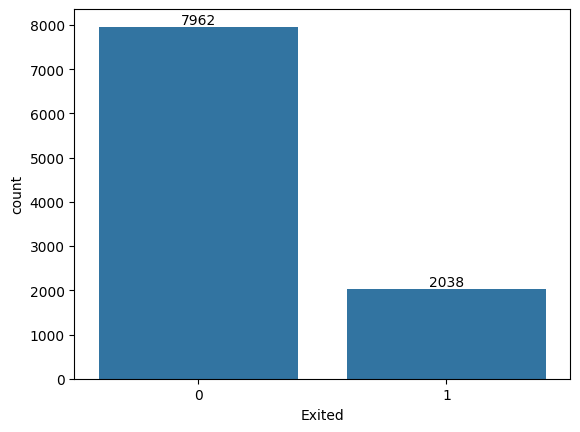

In [482]:
ax = sns.countplot(x='Exited', data=df)
ax.bar_label(ax.containers[0])
# Số lượng khách hàng đã rời bỏ là 2038
# Số lượng khách hàng không rời bỏ là 7962

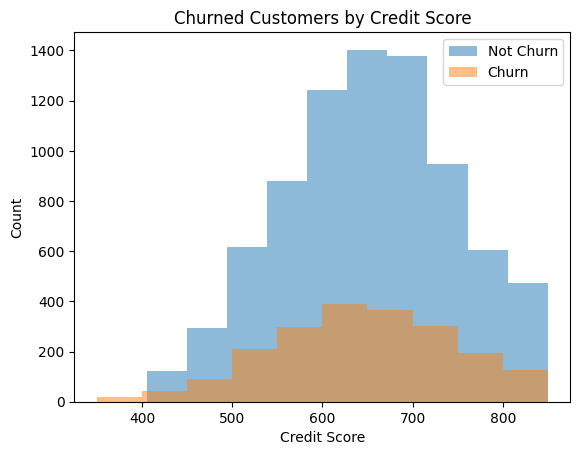

In [483]:
plt.hist(df[df['Exited'] == 0]['CreditScore'], bins=10, alpha=0.5, label='Not Churn')  # Màu xanh
plt.hist(df[df['Exited'] == 1]['CreditScore'], bins=10, alpha=0.5, label='Churn')  # Màu đỏ

plt.title('Churned Customers by Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Count')

plt.legend()

plt.show()

- Credit Score không đóng vai trò quyết định đối với việc khách hàng quyết định rời bỏ dịch vụ.

- Dựa trên biểu đồ histogram, không có sự tương quan rõ ràng giữa Credit Score và quyết định của khách hàng về việc tiếp tục sử dụng hoặc rời bỏ dịch vụ. Khách hàng ở cả hai đầu của phổ điểm Credit Score, cả thấp và cao, đều có khả năng tiếp tục sử dụng hoặc rời bỏ. Tuy nhiên, một số lượng nhỏ khách hàng có điểm Credit Score dưới 400 có xu hướng dễ dàng rời bỏ hơn, nhưng ảnh hưởng của yếu tố này được xem là không đáng kể

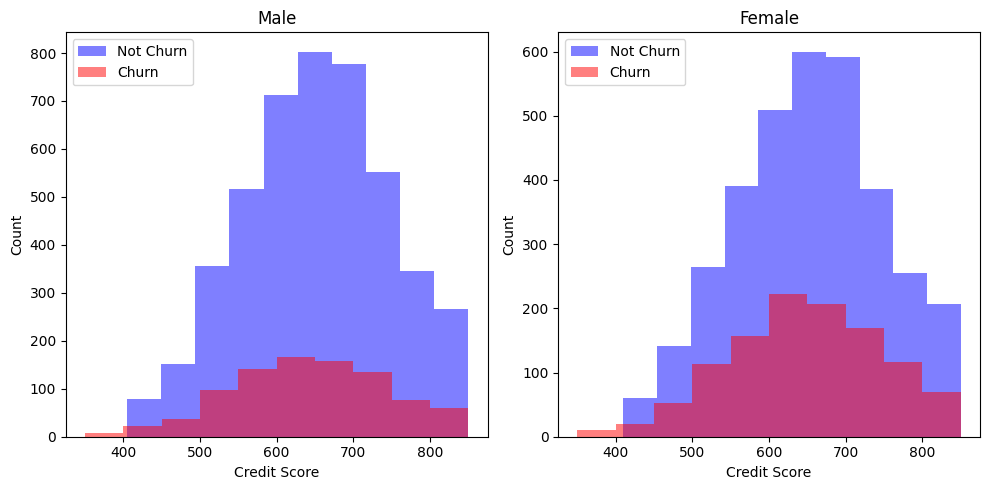

In [484]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].hist(df[(df['Exited'] == 0) & (df['Gender'] == 'Male')]['CreditScore'], bins=10, alpha=0.5, color='blue', label='Not Churn')
axs[0].hist(df[(df['Exited'] == 1) & (df['Gender'] == 'Male')]['CreditScore'], bins=10, alpha=0.5, color='red', label='Churn')
axs[0].set_title('Male')
axs[0].set_xlabel('Credit Score')
axs[0].set_ylabel('Count')
axs[0].legend()

axs[1].hist(df[(df['Exited'] == 0) & (df['Gender'] == 'Female')]['CreditScore'], bins=10, alpha=0.5, color='blue', label='Not Churn')
axs[1].hist(df[(df['Exited'] == 1) & (df['Gender'] == 'Female')]['CreditScore'], bins=10, alpha=0.5, color='red', label='Churn')
axs[1].set_title('Female')
axs[1].set_xlabel('Credit Score')
axs[1].set_ylabel('Count')
axs[1].legend()

plt.tight_layout()
plt.show()

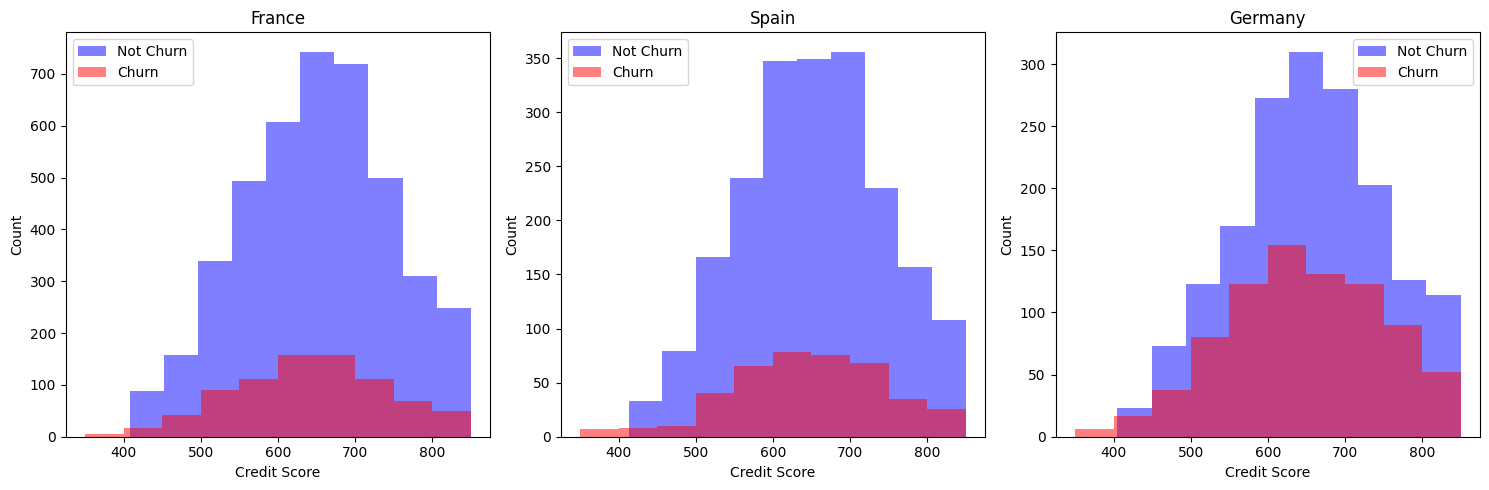

In [485]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].hist(df[(df['Exited'] == 0) & (df['Geography'] == 'France')]['CreditScore'], bins=10, alpha=0.5, color='blue', label='Not Churn')
axs[0].hist(df[(df['Exited'] == 1) & (df['Geography'] == 'France')]['CreditScore'], bins=10, alpha=0.5, color='red', label='Churn')
axs[0].set_title('France')
axs[0].set_xlabel('Credit Score')
axs[0].set_ylabel('Count')
axs[0].legend()

# Vẽ histogram cho quốc gia Tây Ban Nha
axs[1].hist(df[(df['Exited'] == 0) & (df['Geography'] == 'Spain')]['CreditScore'], bins=10, alpha=0.5, color='blue', label='Not Churn')
axs[1].hist(df[(df['Exited'] == 1) & (df['Geography'] == 'Spain')]['CreditScore'], bins=10, alpha=0.5, color='red', label='Churn')
axs[1].set_title('Spain')
axs[1].set_xlabel('Credit Score')
axs[1].set_ylabel('Count')
axs[1].legend()

# Vẽ histogram cho quốc gia Đức
axs[2].hist(df[(df['Exited'] == 0) & (df['Geography'] == 'Germany')]['CreditScore'], bins=10, alpha=0.5, color='blue', label='Not Churn')
axs[2].hist(df[(df['Exited'] == 1) & (df['Geography'] == 'Germany')]['CreditScore'], bins=10, alpha=0.5, color='red', label='Churn')
axs[2].set_title('Germany')
axs[2].set_xlabel('Credit Score')
axs[2].set_ylabel('Count')
axs[2].legend()

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()


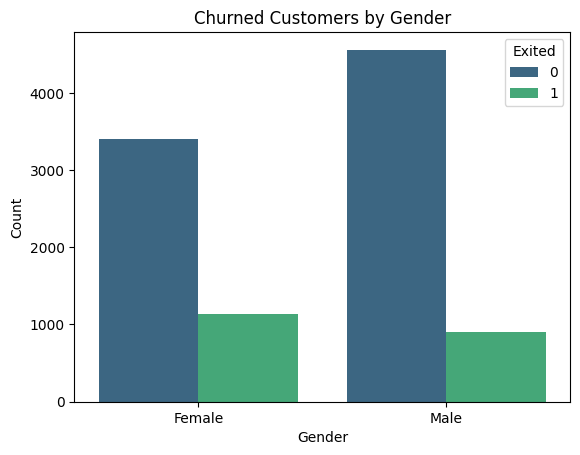

In [486]:
ax = sns.countplot(x='Gender', data=df, hue='Exited',palette='viridis')

plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Churned Customers by Gender')
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_420\3275836884.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Gender', data=df, palette='viridis')


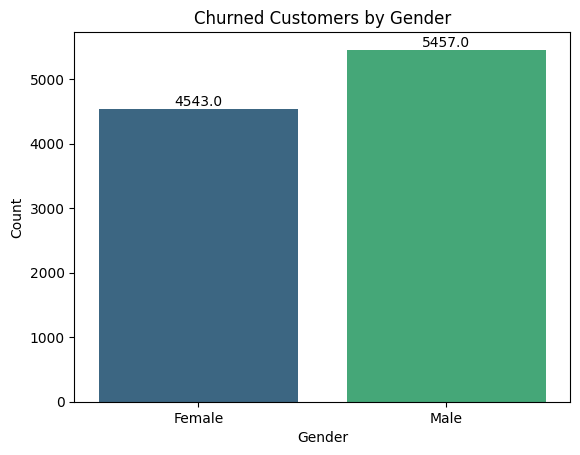

In [487]:
ax = sns.countplot(x='Gender', data=df, palette='viridis')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom')

plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Churned Customers by Gender')
plt.show()

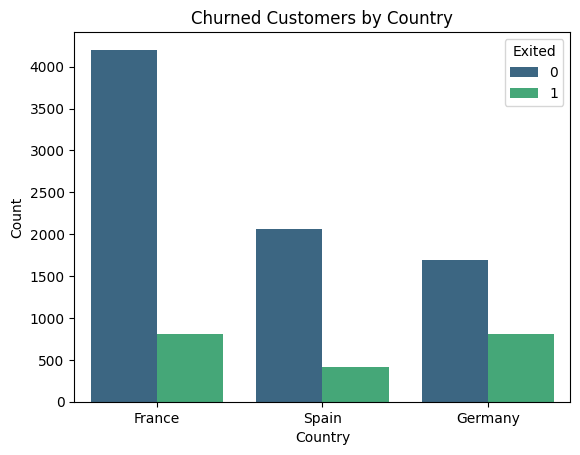

In [488]:
ax = sns.countplot(x='Geography', data=df, hue='Exited',palette='viridis')

plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Churned Customers by Country')
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_420\2697070955.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Geography', data=df, palette='viridis')


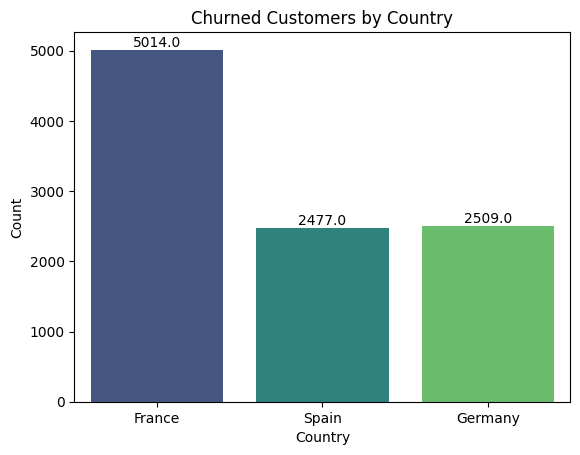

In [489]:
ax = sns.countplot(x='Geography', data=df, palette='viridis')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom')

# Hiển thị biểu đồ
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Churned Customers by Country')
plt.show()

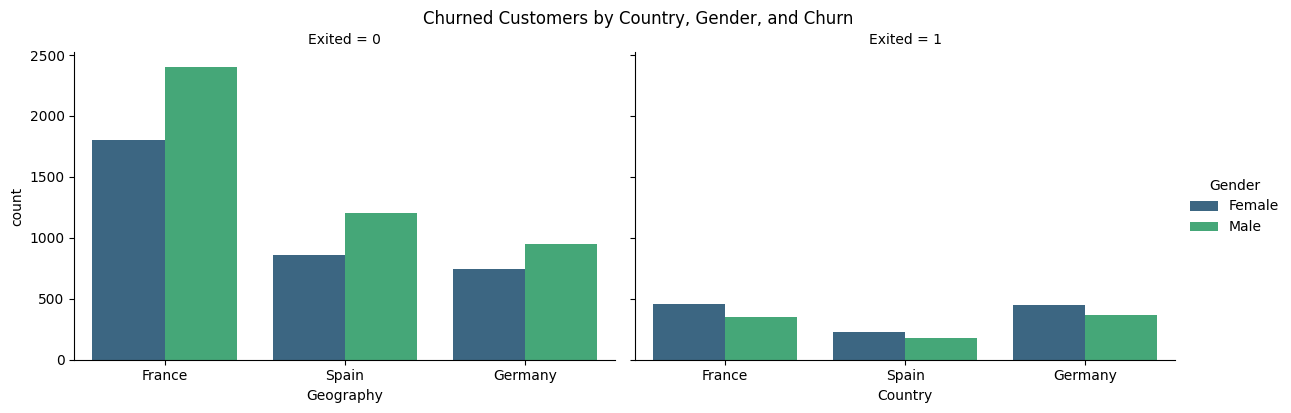

In [490]:
sns.catplot(x='Geography', hue='Gender', col='Exited', data=df, kind='count', palette='viridis', height=4, aspect=1.5)

plt.xlabel('Country')
plt.ylabel('Count')
plt.suptitle('Churned Customers by Country, Gender, and Churn', y=1.02)
plt.show()

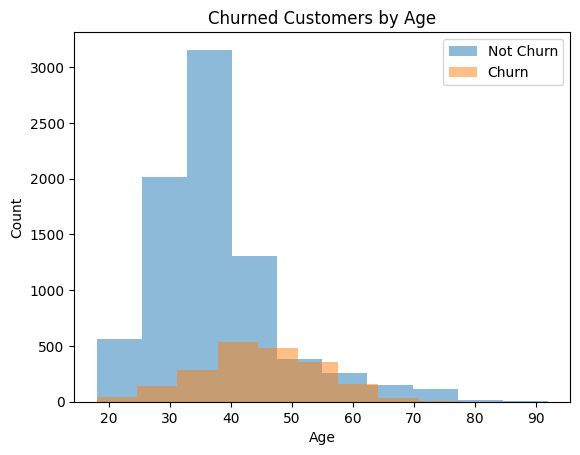

In [491]:
plt.hist(df[df['Exited'] == 0]['Age'], bins=10, alpha=0.5, label='Not Churn')  # Màu xanh
plt.hist(df[df['Exited'] == 1]['Age'], bins=10, alpha=0.5, label='Churn')  # Màu đỏ

plt.title('Churned Customers by Age')
plt.xlabel('Age')
plt.ylabel('Count')

plt.legend()

plt.show()

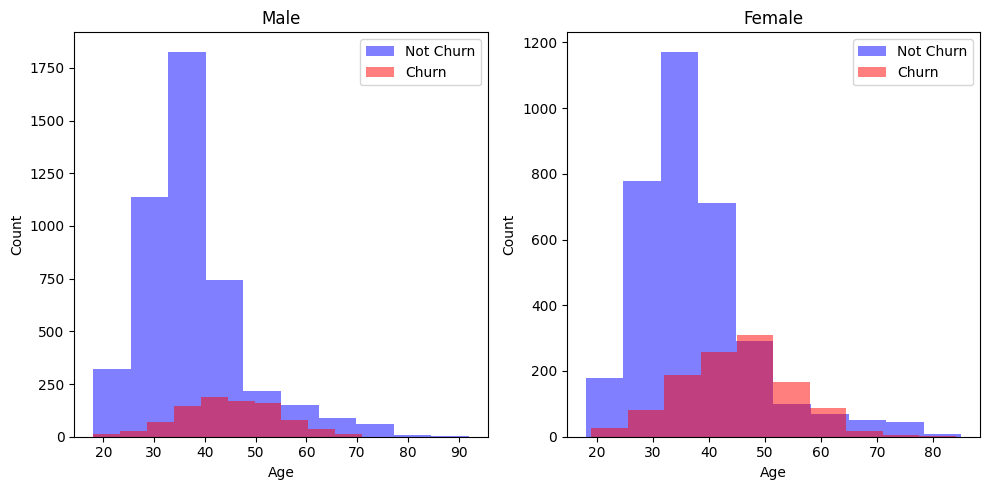

In [492]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].hist(df[(df['Exited'] == 0) & (df['Gender'] == 'Male')]['Age'], bins=10, alpha=0.5, color='blue', label='Not Churn')
axs[0].hist(df[(df['Exited'] == 1) & (df['Gender'] == 'Male')]['Age'], bins=10, alpha=0.5, color='red', label='Churn')
axs[0].set_title('Male')
axs[0].set_xlabel('Age')
axs[0].set_ylabel('Count')
axs[0].legend()

axs[1].hist(df[(df['Exited'] == 0) & (df['Gender'] == 'Female')]['Age'], bins=10, alpha=0.5, color='blue', label='Not Churn')
axs[1].hist(df[(df['Exited'] == 1) & (df['Gender'] == 'Female')]['Age'], bins=10, alpha=0.5, color='red', label='Churn')
axs[1].set_title('Female')
axs[1].set_xlabel('Age')
axs[1].set_ylabel('Count')
axs[1].legend()

plt.tight_layout()
plt.show()

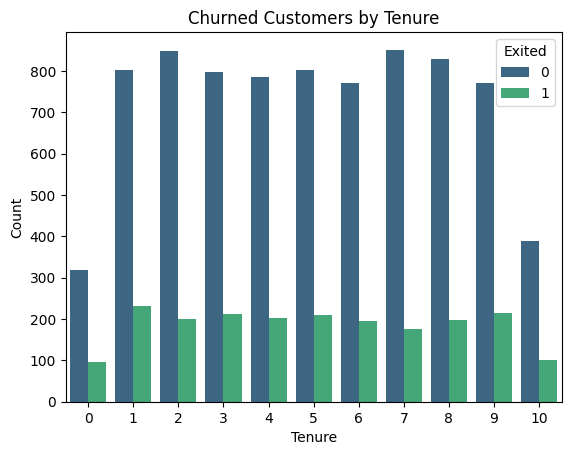

In [493]:
ax = sns.countplot(x='Tenure', data=df, hue='Exited',palette='viridis')

plt.xlabel('Tenure')
plt.ylabel('Count')
plt.title('Churned Customers by Tenure')
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_420\25204466.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Tenure', data=df, palette='viridis')


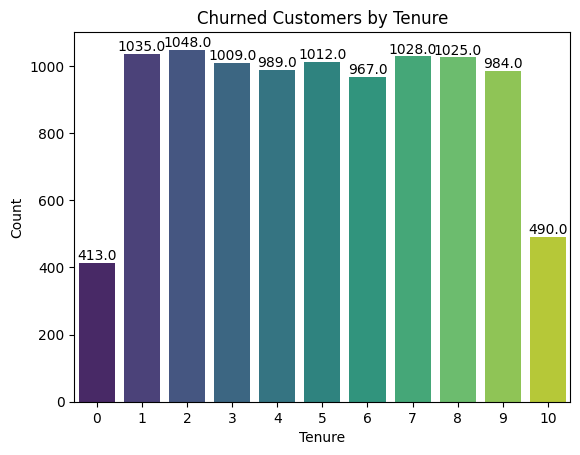

In [494]:
ax = sns.countplot(x='Tenure', data=df, palette='viridis')

# Thêm số liệu cụ thể của từng cột
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom')

# Hiển thị biểu đồ
plt.xlabel('Tenure')
plt.ylabel('Count')
plt.title('Churned Customers by Tenure')
plt.show()

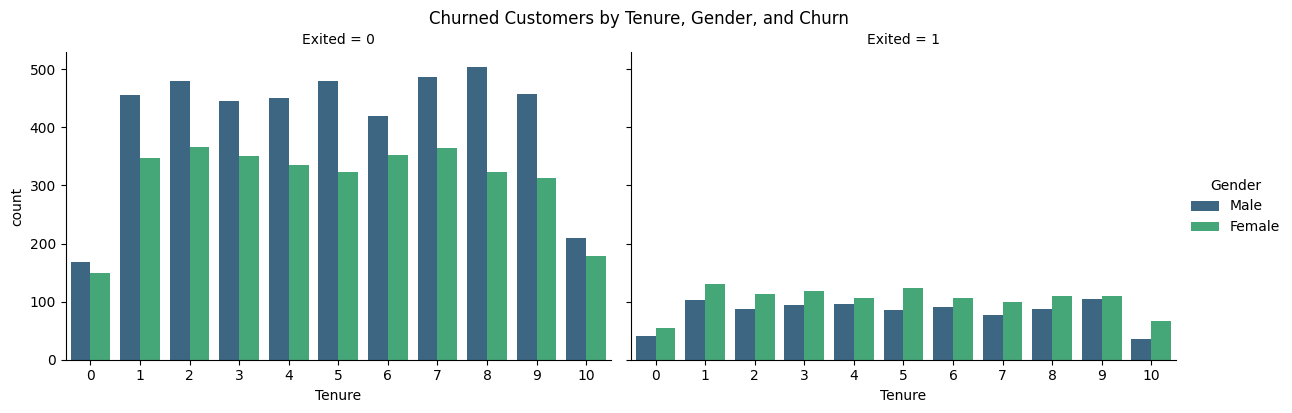

In [495]:
sns.catplot(x='Tenure', hue='Gender', col='Exited', data=df, kind='count', palette='viridis', height=4, aspect=1.5)

# Định dạng và hiển thị biểu đồ
plt.xlabel('Tenure')
plt.ylabel('Count')
plt.suptitle('Churned Customers by Tenure, Gender, and Churn', y=1.02)
plt.show()

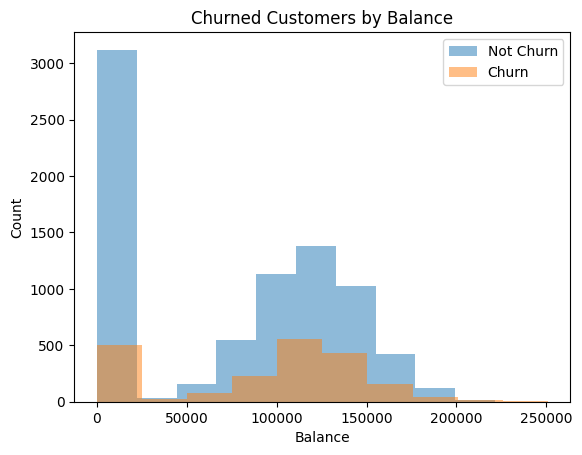

In [496]:
plt.hist(df[df['Exited'] == 0]['Balance'], bins=10, alpha=0.5, label='Not Churn')  # Màu xanh
plt.hist(df[df['Exited'] == 1]['Balance'], bins=10, alpha=0.5, label='Churn')  # Màu đỏ

plt.title('Churned Customers by Balance')
plt.xlabel('Balance')
plt.ylabel('Count')

plt.legend()

plt.show()

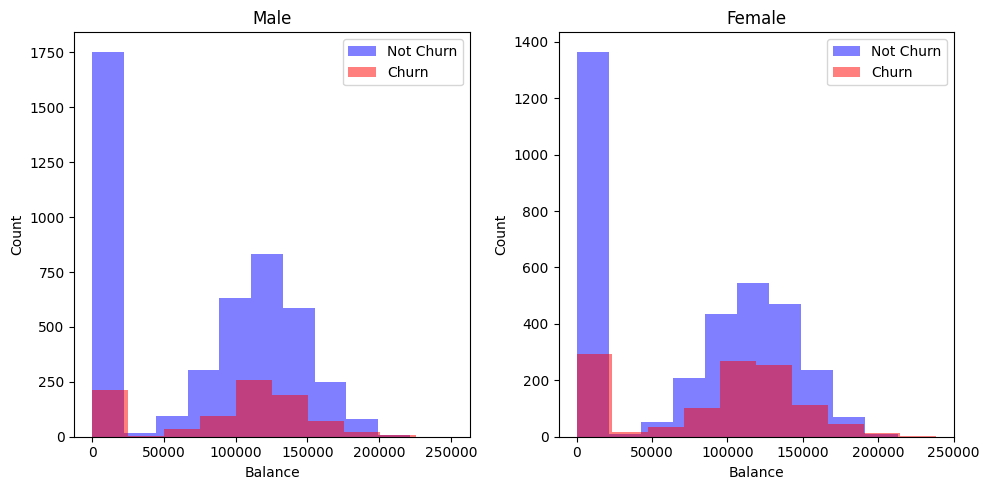

In [497]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].hist(df[(df['Exited'] == 0) & (df['Gender'] == 'Male')]['Balance'], bins=10, alpha=0.5, color='blue', label='Not Churn')
axs[0].hist(df[(df['Exited'] == 1) & (df['Gender'] == 'Male')]['Balance'], bins=10, alpha=0.5, color='red', label='Churn')
axs[0].set_title('Male')
axs[0].set_xlabel('Balance')
axs[0].set_ylabel('Count')
axs[0].legend()

axs[1].hist(df[(df['Exited'] == 0) & (df['Gender'] == 'Female')]['Balance'], bins=10, alpha=0.5, color='blue', label='Not Churn')
axs[1].hist(df[(df['Exited'] == 1) & (df['Gender'] == 'Female')]['Balance'], bins=10, alpha=0.5, color='red', label='Churn')
axs[1].set_title('Female')
axs[1].set_xlabel('Balance')
axs[1].set_ylabel('Count')
axs[1].legend()

plt.tight_layout()
plt.show()

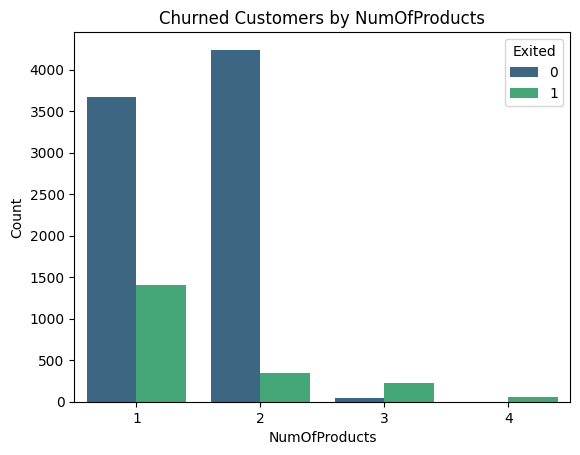

In [498]:
ax = sns.countplot(x='NumOfProducts', data=df, hue='Exited',palette='viridis')


plt.xlabel('NumOfProducts')
plt.ylabel('Count')
plt.title('Churned Customers by NumOfProducts')
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_420\2015751010.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='NumOfProducts', data=df, palette='viridis')


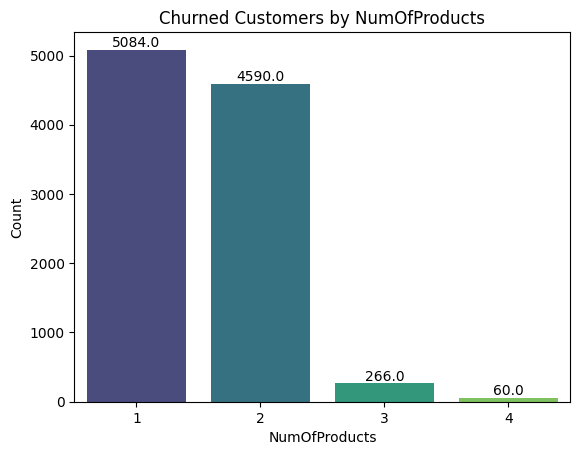

In [499]:
ax = sns.countplot(x='NumOfProducts', data=df, palette='viridis')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom')

plt.xlabel('NumOfProducts')
plt.ylabel('Count')
plt.title('Churned Customers by NumOfProducts')
plt.show()

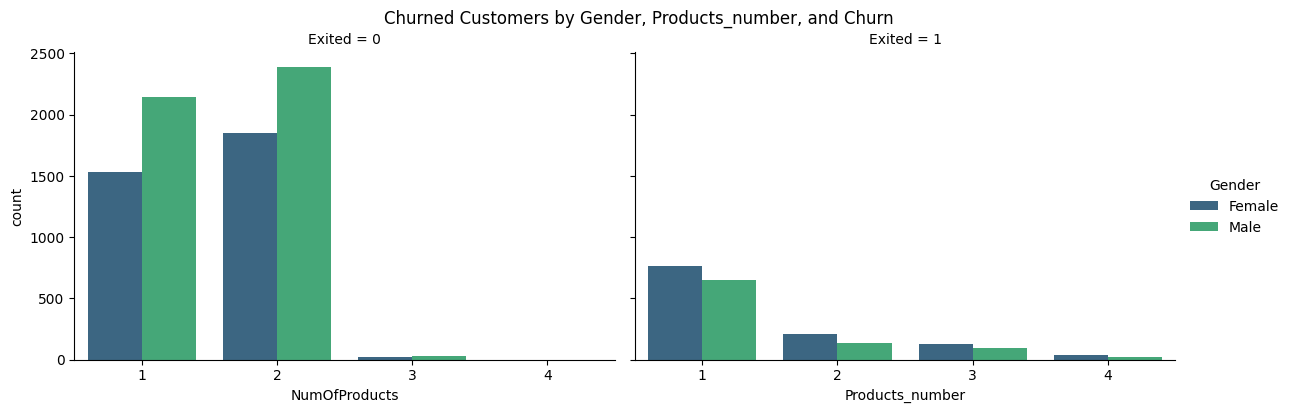

In [500]:
sns.catplot(x='NumOfProducts', hue='Gender', col='Exited', data=df, kind='count', palette='viridis', height=4, aspect=1.5)

plt.xlabel('Products_number')
plt.ylabel('Count')
plt.suptitle('Churned Customers by Gender, Products_number, and Churn', y=1.02)
plt.show()

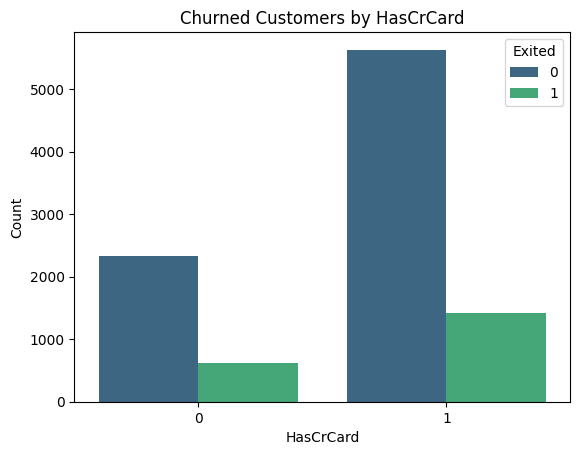

In [501]:
ax = sns.countplot(x='HasCrCard', data=df, hue='Exited',palette='viridis')

plt.xlabel('HasCrCard')
plt.ylabel('Count')
plt.title('Churned Customers by HasCrCard')
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_420\1049530877.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='HasCrCard', data=df, palette='viridis')


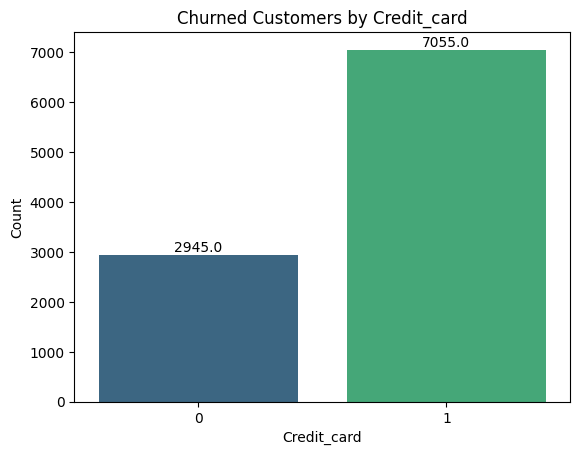

In [502]:
ax = sns.countplot(x='HasCrCard', data=df, palette='viridis')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom')

plt.xlabel('Credit_card')
plt.ylabel('Count')
plt.title('Churned Customers by Credit_card')
plt.show()

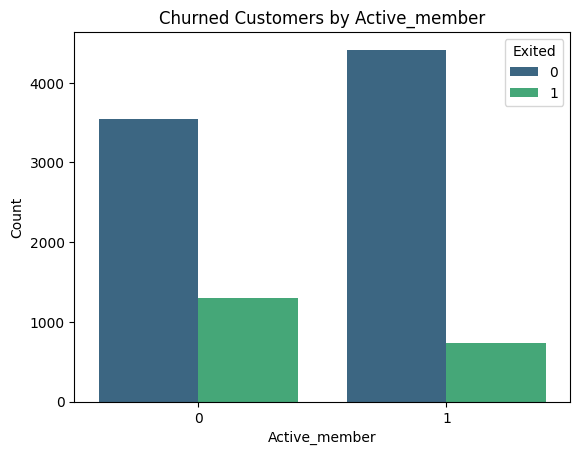

In [503]:
ax = sns.countplot(x='IsActiveMember', data=df, hue='Exited',palette='viridis')

plt.xlabel('Active_member')
plt.ylabel('Count')
plt.title('Churned Customers by Active_member')
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_420\3054777580.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='IsActiveMember', data=df, palette='viridis')


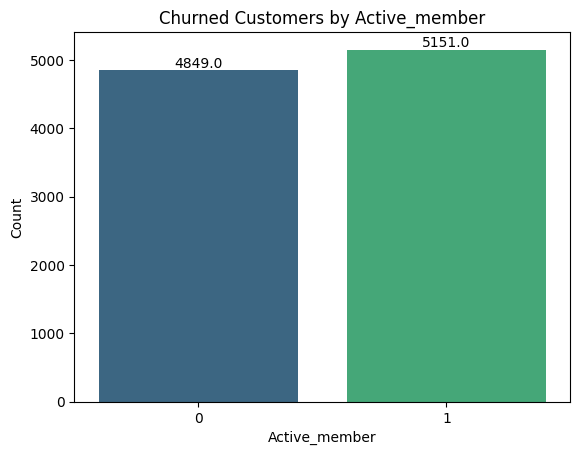

In [504]:
ax = sns.countplot(x='IsActiveMember', data=df, palette='viridis')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom')

plt.xlabel('Active_member')
plt.ylabel('Count')
plt.title('Churned Customers by Active_member')
plt.show()

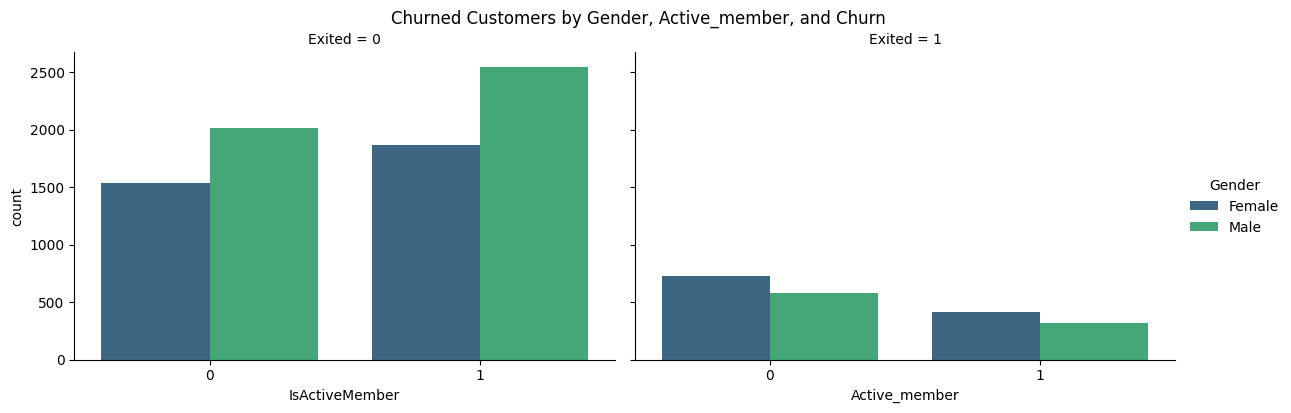

In [505]:
sns.catplot(x='IsActiveMember', hue='Gender', col='Exited', data=df, kind='count', palette='viridis', height=4, aspect=1.5)

plt.xlabel('Active_member')
plt.ylabel('Count')
plt.suptitle('Churned Customers by Gender, Active_member, and Churn', y=1.02)
plt.show()

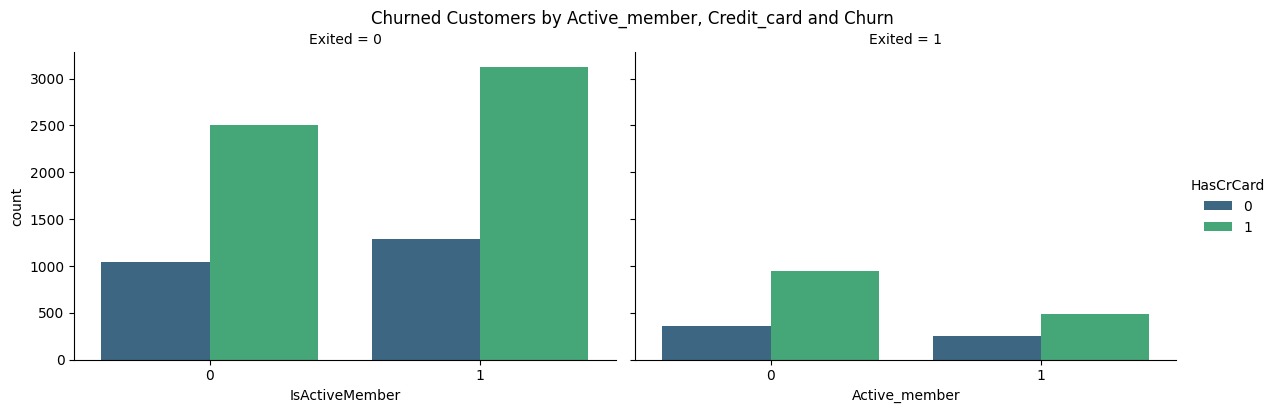

In [506]:
sns.catplot(x='IsActiveMember', hue='HasCrCard', col='Exited', data=df, kind='count', palette='viridis', height=4, aspect=1.5)

plt.xlabel('Active_member')
plt.ylabel('Count')
plt.suptitle('Churned Customers by Active_member, Credit_card and Churn', y=1.02)
plt.show()

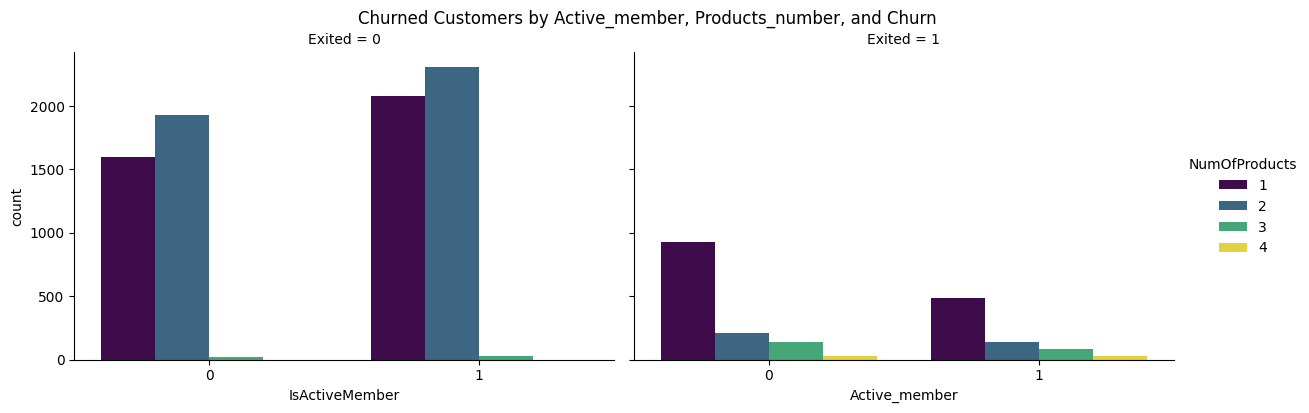

In [507]:
sns.catplot(x='IsActiveMember', hue='NumOfProducts', col='Exited', data=df, kind='count', palette='viridis', height=4, aspect=1.5)

plt.xlabel('Active_member')
plt.ylabel('Count')
plt.suptitle('Churned Customers by Active_member, Products_number, and Churn', y=1.02)
plt.show()

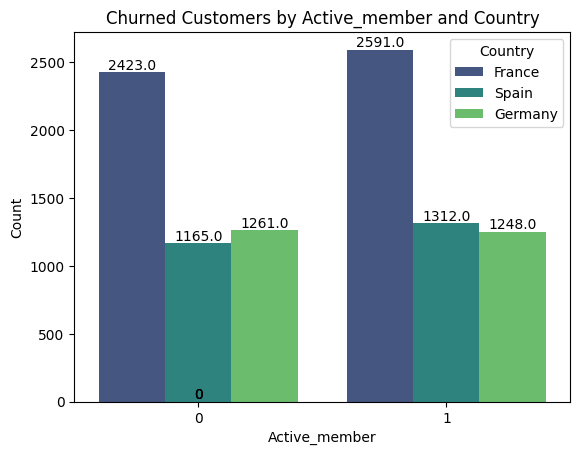

In [508]:
ax = sns.countplot(x='IsActiveMember', hue='Geography', data=df, palette='viridis')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom')

plt.xlabel('Active_member')
plt.ylabel('Count')
plt.title('Churned Customers by Active_member and Country')
plt.legend(title='Country')
plt.show()

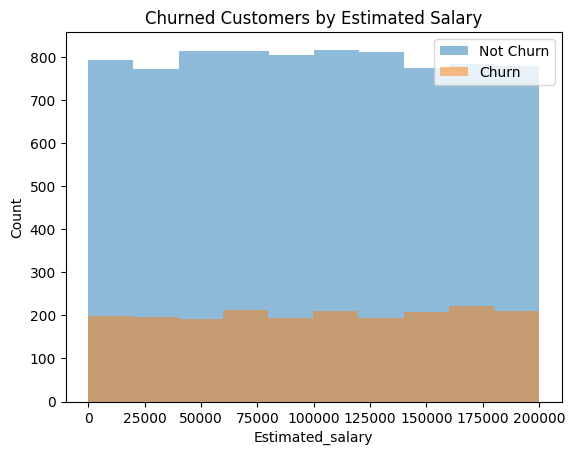

In [509]:
plt.hist(df[df['Exited'] == 0]['EstimatedSalary'], bins=10, alpha=0.5, label='Not Churn')  # Màu xanh
plt.hist(df[df['Exited'] == 1]['EstimatedSalary'], bins=10, alpha=0.5, label='Churn')  # Màu đỏ

plt.title('Churned Customers by Estimated Salary')
plt.xlabel('Estimated_salary')
plt.ylabel('Count')

# Hiển thị chú thích
plt.legend()

# Hiển thị biểu đồ
plt.show()

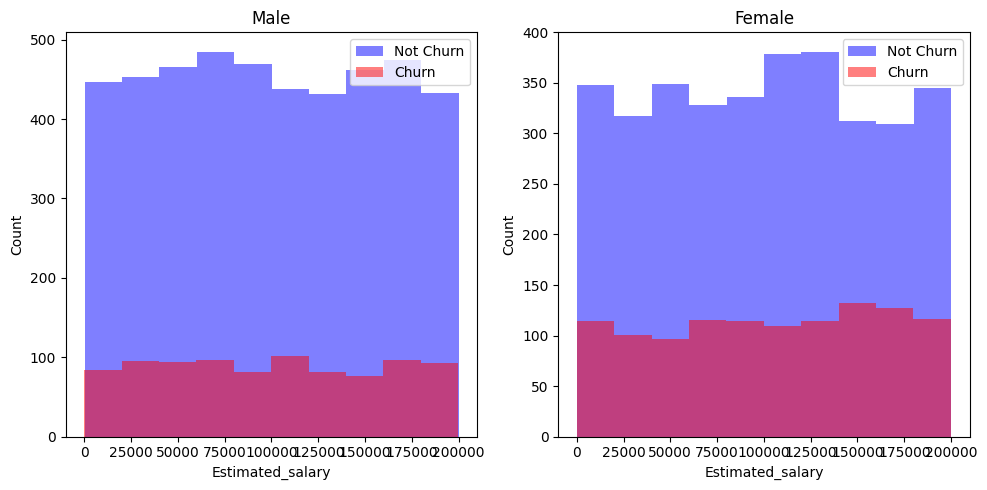

In [510]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].hist(df[(df['Exited'] == 0) & (df['Gender'] == 'Male')]['EstimatedSalary'], bins=10, alpha=0.5, color='blue', label='Not Churn')
axs[0].hist(df[(df['Exited'] == 1) & (df['Gender'] == 'Male')]['EstimatedSalary'], bins=10, alpha=0.5, color='red', label='Churn')
axs[0].set_title('Male')
axs[0].set_xlabel('Estimated_salary')
axs[0].set_ylabel('Count')
axs[0].legend()

axs[1].hist(df[(df['Exited'] == 0) & (df['Gender'] == 'Female')]['EstimatedSalary'], bins=10, alpha=0.5, color='blue', label='Not Churn')
axs[1].hist(df[(df['Exited'] == 1) & (df['Gender'] == 'Female')]['EstimatedSalary'], bins=10, alpha=0.5, color='red', label='Churn')
axs[1].set_title('Female')
axs[1].set_xlabel('Estimated_salary')
axs[1].set_ylabel('Count')
axs[1].legend()

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

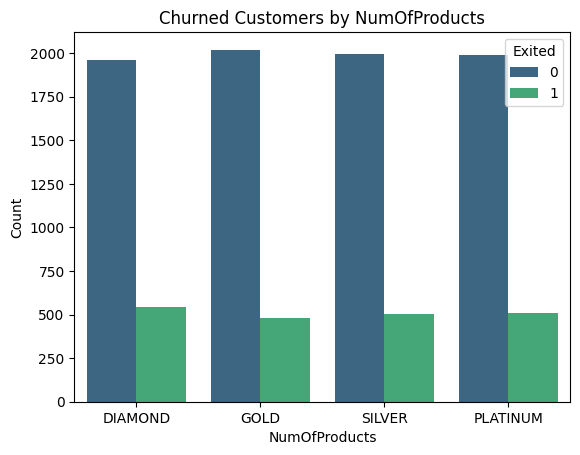

In [21]:
ax = sns.countplot(x='Card_Type', data=df, hue='Exited',palette='viridis')


plt.xlabel('NumOfProducts')
plt.ylabel('Count')
plt.title('Churned Customers by NumOfProducts')
plt.show()

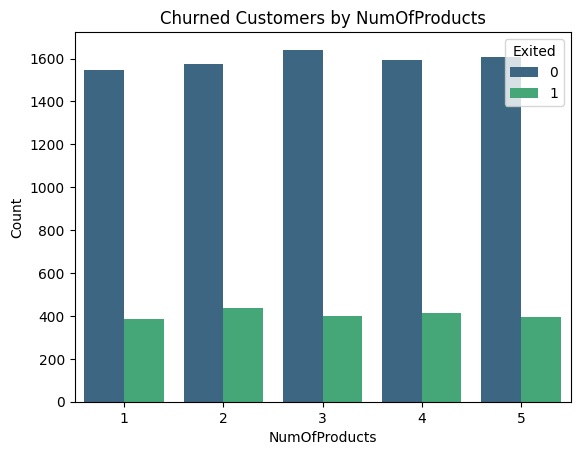

In [24]:
ax = sns.countplot(x='Satisfaction_Score', data=df, hue='Exited',palette='viridis')


plt.xlabel('NumOfProducts')
plt.ylabel('Count')
plt.title('Churned Customers by NumOfProducts')
plt.show()

# DECODE DATA

In [511]:
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
order = {'SILVER': 0, 'GOLD': 1, 'PLATINUM': 2, 'DIAMOND': 3}
df['Card_Type'] = df['Card_Type'].map(order)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction_Score,Card_Type,Point_Earned
0,619,France,0,42,2,0.00,1,1,1,101348.88,1,1,2,3,464
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0,1,3,3,456
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1,1,3,3,377
3,699,France,0,39,1,0.00,2,0,0,93826.63,0,0,5,1,350
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0,0,5,1,425


In [512]:
df["Gender"].replace(['Male', 'Female'], [0,1], inplace = True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_420\1911733964.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Gender"].replace(['Male', 'Female'], [0,1], inplace = True)


In [513]:
df = df.drop('Geography', axis=1)

In [514]:
x = df.drop(columns = "Exited")
y = df["Exited"]

In [515]:
x.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction_Score,Card_Type,Point_Earned
0,619,0,42,2,0.00,1,1,1,101348.88,1,2,3,464
1,608,0,41,1,83807.86,1,0,1,112542.58,1,3,3,456
2,502,0,42,8,159660.80,3,1,0,113931.57,1,3,3,377
3,699,0,39,1,0.00,2,0,0,93826.63,0,5,1,350
4,850,0,43,2,125510.82,1,1,1,79084.10,0,5,1,425


In [516]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [517]:
df.Gender.value_counts()

Gender
1    5457
0    4543
Name: count, dtype: int64

## Train and test split

In [518]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

### Modeling
#### Descision Tree

In [519]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         10000 non-null  int64  
 1   Gender              10000 non-null  int32  
 2   Age                 10000 non-null  int64  
 3   Tenure              10000 non-null  int64  
 4   Balance             10000 non-null  float64
 5   NumOfProducts       10000 non-null  int64  
 6   HasCrCard           10000 non-null  int64  
 7   IsActiveMember      10000 non-null  int64  
 8   EstimatedSalary     10000 non-null  float64
 9   Exited              10000 non-null  int64  
 10  Complain            10000 non-null  int64  
 11  Satisfaction_Score  10000 non-null  int64  
 12  Card_Type           10000 non-null  int64  
 13  Point_Earned        10000 non-null  int64  
dtypes: float64(2), int32(1), int64(11)
memory usage: 1.0 MB


In [520]:
model_DT = DecisionTreeClassifier()
model_DT.fit(x_train, y_train)

DecisionTreeClassifier()

In [522]:
y_predict_test = model_DT.predict(x_test)
y_test.values[:20]


array([0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
      dtype=int64)

In [523]:
y_predict_test[:20]

array([0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
      dtype=int64)

In [524]:
from sklearn.metrics import accuracy_score, classification_report
print("Số dữ liệu: ", len(y_predict_test))
accuracy_score(y_test, y_predict_test)
print(classification_report(y_test, y_predict_test))

Số dữ liệu:  2000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1595
           1       1.00      0.99      0.99       405

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



Accuracy of testing is: 0.9975
[[1593    2]
 [   3  402]]


Text(20.72222222222222, 0.5, 'Actual')

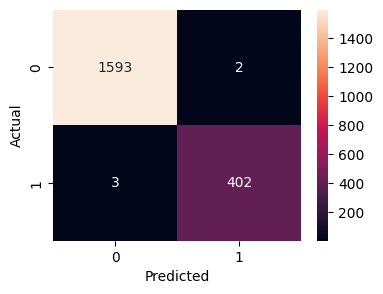

In [525]:
from sklearn.metrics import accuracy_score, confusion_matrix
acc_test = accuracy_score(y_test, y_predict_test)
print("Accuracy of testing is: {}".format(acc_test))
cm = confusion_matrix(y_test, y_predict_test)
print(cm)
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot = True, fmt = "g")
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [526]:
model_RF = RandomForestClassifier()
model_RF.fit(x_train, y_train)

RandomForestClassifier()

In [527]:
y_predict_test = model_RF.predict(x_test)

In [528]:
y_test.values[:20]

array([0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
      dtype=int64)

In [529]:
y_predict_test[:20]

array([0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
      dtype=int64)

In [530]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1595
           1       1.00      1.00      1.00       405

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



Accuracy of testing is: 0.9995
[[1595    0]
 [   1  404]]


Text(20.72222222222222, 0.5, 'Actual')

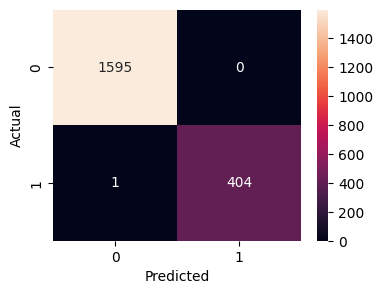

In [531]:
from sklearn.metrics import accuracy_score, confusion_matrix
acc_test = accuracy_score(y_test, y_predict_test)
print("Accuracy of testing is: {}".format(acc_test))
cm = confusion_matrix(y_test, y_predict_test)
print(cm)
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot = True, fmt = "g")
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [532]:
model_LR = LogisticRegression()
model_LR.fit(x_train, y_train)

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [533]:
y_predict_test = model_LR.predict(x_test)
y_test.values[:20]

array([0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
      dtype=int64)

In [534]:
y_predict_test[:20]

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [535]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      1595
           1       0.58      0.29      0.39       405

    accuracy                           0.81      2000
   macro avg       0.71      0.62      0.64      2000
weighted avg       0.79      0.81      0.79      2000



Accuracy of testing is: 0.8135
[[1509   86]
 [ 287  118]]


Text(20.72222222222222, 0.5, 'Actual')

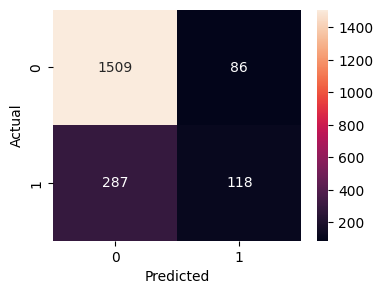

In [536]:
from sklearn.metrics import accuracy_score, confusion_matrix
acc_test = accuracy_score(y_test, y_predict_test)
print("Accuracy of testing is: {}".format(acc_test))
cm = confusion_matrix(y_test, y_predict_test)
print(cm)
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot = True, fmt = "g")
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [537]:
model_GB = GradientBoostingClassifier()
model_GB.fit(x_train, y_train)

GradientBoostingClassifier()

In [538]:
y_predict_test = model_GB.predict(x_test)

In [539]:
y_test.values[:20]

array([0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
      dtype=int64)

In [540]:
y_predict_test[:20]

array([0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
      dtype=int64)

In [541]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1595
           1       1.00      1.00      1.00       405

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



Accuracy of testing is: 0.9985
[[1594    1]
 [   2  403]]


Text(20.72222222222222, 0.5, 'Actual')

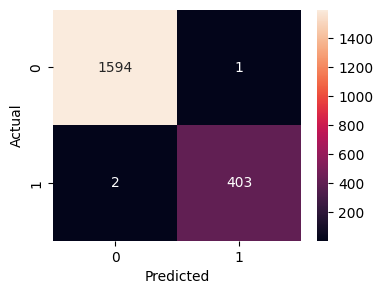

In [542]:
from sklearn.metrics import accuracy_score, confusion_matrix
acc_test = accuracy_score(y_test, y_predict_test)
print("Accuracy of testing is: {}".format(acc_test))
cm = confusion_matrix(y_test, y_predict_test)
print(cm)
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot = True, fmt = "g")
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [543]:
model_SVM = SVC()
model_SVM.fit(x_train, y_train)

SVC()

In [544]:
y_predict_test = model_SVM.predict(x_test)
y_test.values[:20]

array([0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
      dtype=int64)

In [545]:
y_predict_test[:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [546]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1595
           1       0.00      0.00      0.00       405

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.64      0.80      0.71      2000



c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [547]:
svc_model = SVC(random_state = 1)
svc_model.fit(x_train,y_train)
predict_y = svc_model.predict(x_test)
accuracy_svc = svc_model.score(x_test,y_test)
print("SVM accuracy is :",accuracy_svc)

SVM accuracy is : 0.7975


Accuracy of testing is: 0.7975
[[1595    0]
 [ 405    0]]


Text(20.72222222222222, 0.5, 'Actual')

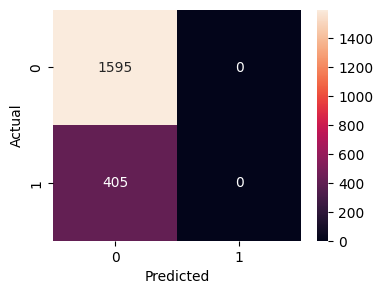

In [548]:
from sklearn.metrics import accuracy_score, confusion_matrix
acc_test = accuracy_score(y_test, y_predict_test)
print("Accuracy of testing is: {}".format(acc_test))
cm = confusion_matrix(y_test, y_predict_test)
print(cm)
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot = True, fmt = "g")
plt.xlabel("Predicted")
plt.ylabel("Actual")